<a href="https://colab.research.google.com/github/TTB-gif/-TTB-gif--DataScience-GenAI-Submissions/blob/main/Week_7_seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#load the file loan data csv
#loan data csv is in my downloads how do i upload it
#Generate code to upload 'loan_data.csv' using files.upload()

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving loan_data.csv to loan_data.csv
User uploaded file "loan_data.csv" with length 3454959 bytes


After uploading, the file will be available in the current working directory. You can then proceed to load it with pandas:

In [3]:
import pandas as pd

df = pd.read_csv('loan_data.csv')
display(df.head())

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,17.2,25579,692,5.3,895,10820,0,0,0,600,17.02,0.423,0.023,0.008,1
1,33,7.3,43087,627,3.5,169,16550,0,1,0,53300,14.10,0.384,1.237,0.412,0
2,42,1.1,20840,689,8.4,17,7852,0,0,0,2100,18.33,0.377,0.101,0.034,1
3,53,0.5,29147,692,9.8,1480,11603,0,1,0,2900,18.74,0.398,0.099,0.033,1
4,32,12.5,63657,630,7.2,209,12424,0,0,0,99600,13.92,0.195,1.565,0.522,1


FileNotFoundError: [Errno 2] No such file or directory: 'loan_data.csv'

In [4]:
print('DataFrame Info:')
df.info()

print('\nMissing Values (Count):')
display(df.isnull().sum())

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      50000 non-null  int64  
 1   years_employed           50000 non-null  float64
 2   annual_income            50000 non-null  int64  
 3   credit_score             50000 non-null  int64  
 4   credit_history_years     50000 non-null  float64
 5   savings_assets           50000 non-null  int64  
 6   current_debt             50000 non-null  int64  
 7   defaults_on_file         50000 non-null  int64  
 8   delinquencies_last_2yrs  50000 non-null  int64  
 9   derogatory_marks         50000 non-null  int64  
 10  loan_amount              50000 non-null  int64  
 11  interest_rate            50000 non-null  float64
 12  debt_to_income_ratio     50000 non-null  float64
 13  loan_to_income_ratio     50000 non-null  float64
 14  paymen

,0
age,0
years_employed,0
annual_income,0
credit_score,0
credit_history_years,0
savings_assets,0
current_debt,0
defaults_on_file,0
delinquencies_last_2yrs,0
derogatory_marks,0


In [5]:
from sklearn.model_selection import train_test_split

# Assuming 'loan_status' is the target variable (y) and the rest are features (X)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into 70% training and 30% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (35000, 15)
Shape of y_train: (35000,)
Shape of X_test: (15000, 15)
Shape of y_test: (15000,)


In [ ]:
#using the code from https://github.com/TTB-gif/-TTB-gif--DataScience-GenAI-Submissions/blob/main/Copy_of_6_02_DNN_101.ipynb make a basic logistic regression model to predict the loan status

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is a good choice for smaller datasets or L1/L2 regularization

# Train the model
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully!")

Logistic Regression model trained successfully!


In [7]:
# Make predictions on the test set
y_pred = log_reg_model.predict(X_test)
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1] # Probability of the positive class (loan_status = 1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.7373
Precision: 0.7458
Recall: 0.7912
F1-Score: 0.7678
ROC AUC Score: 0.8184


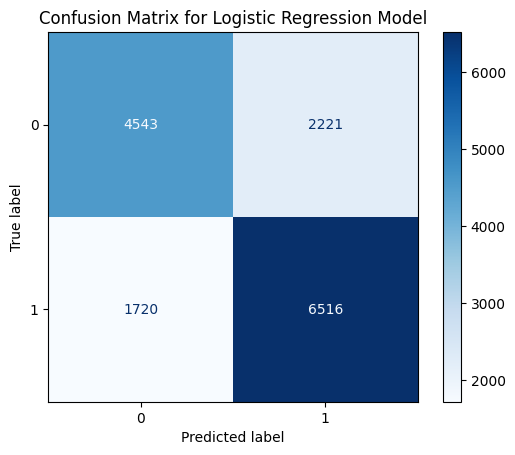

In [8]:
#Plot a confusion matrix for the model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg_model.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [ ]:
#Now using the code from the prior link make the data into tensors and split it into batches

# Task
Convert `X_train`, `y_train`, `X_test`, and `y_test` to TensorFlow tensors. Then, create batched TensorFlow `Dataset` objects for both training and testing, and verify their structure, batch size, and element types.

## Convert Data to Tensors and Create Batched Datasets

### Subtask:
Convert `X_train`, `y_train`, `X_test`, and `y_test` into TensorFlow tensors. Then, create TensorFlow `Dataset` objects for both training and testing, and batch them for efficient model training.


**Reasoning**:
The subtask requires converting pandas DataFrames and Series to TensorFlow tensors and then creating batched TensorFlow Dataset objects. This step will import TensorFlow, perform the conversions, and create the batched datasets as specified in the instructions.



In [9]:
import tensorflow as tf

# Convert DataFrames/Series to TensorFlow tensors
X_train_tensor = tf.constant(X_train.values, dtype=tf.float32)
X_test_tensor = tf.constant(X_test.values, dtype=tf.float32)
y_train_tensor = tf.constant(y_train.values, dtype=tf.float32)
y_test_tensor = tf.constant(y_test.values, dtype=tf.float32)

# Create TensorFlow Dataset objects
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_tensor, y_test_tensor))

# Batch the datasets
batch_size = 32
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

print("Data successfully converted to TensorFlow tensors and batched datasets created.")
print(f"Train dataset batch format: {next(iter(train_dataset))}")
print(f"Test dataset batch format: {next(iter(test_dataset))}")

Data successfully converted to TensorFlow tensors and batched datasets created.
Train dataset batch format: (<tf.Tensor: shape=(32, 15), dtype=float32, numpy=
array([[4.00000e+01, 7.10000e+00, 1.49276e+05, 6.30000e+02, 7.10000e+00,
        1.76100e+03, 2.63710e+04, 0.00000e+00, 3.00000e+00, 0.00000e+00,
        7.00000e+04, 2.00600e+01, 1.77000e-01, 4.69000e-01, 1.56000e-01],
       [3.40000e+01, 7.80000e+00, 6.59550e+04, 6.32000e+02, 2.80000e+00,
        3.18000e+02, 1.00610e+04, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        7.00000e+04, 2.00100e+01, 1.53000e-01, 1.06100e+00, 3.54000e-01],
       [3.10000e+01, 8.30000e+00, 4.70170e+04, 5.67000e+02, 1.13000e+01,
        1.23100e+03, 6.12000e+03, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.53000e+04, 1.30400e+01, 1.30000e-01, 3.25000e-01, 1.08000e-01],
       [5.30000e+01, 1.00000e+01, 5.13680e+04, 7.20000e+02, 1.59000e+01,
        2.51000e+02, 1.76930e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        3.71000e+04, 1.11300e+01, 3

## Verify Batched Data

### Subtask:
Inspect the created batched datasets (`train_dataset`, `test_dataset`) to confirm their structure, batch size, and element types.


**Reasoning**:
To verify the structure, batch size, and element types of the created batched datasets, I will obtain a single batch from both the training and testing datasets, then print the shape and data type of their feature and label tensors.



In [10]:
import tensorflow as tf

# Obtain one batch from each dataset
train_features_batch, train_labels_batch = next(iter(train_dataset))
test_features_batch, test_labels_batch = next(iter(test_dataset))

print("\n--- Training Dataset Batch Information ---")
print(f"Shape of training features batch: {train_features_batch.shape}")
print(f"Data type of training features batch: {train_features_batch.dtype}")
print(f"Shape of training labels batch: {train_labels_batch.shape}")
print(f"Data type of training labels batch: {train_labels_batch.dtype}")

print("\n--- Test Dataset Batch Information ---")
print(f"Shape of test features batch: {test_features_batch.shape}")
print(f"Data type of test features batch: {test_features_batch.dtype}")
print(f"Shape of test labels batch: {test_labels_batch.shape}")
print(f"Data type of test labels batch: {test_labels_batch.dtype}")


--- Training Dataset Batch Information ---
Shape of training features batch: (32, 15)
Data type of training features batch: <dtype: 'float32'>
Shape of training labels batch: (32,)
Data type of training labels batch: <dtype: 'float32'>

--- Test Dataset Batch Information ---
Shape of test features batch: (32, 15)
Data type of test features batch: <dtype: 'float32'>
Shape of test labels batch: (32,)
Data type of test labels batch: <dtype: 'float32'>


## Final Task

### Subtask:
Confirm that the data has been successfully transformed into batched TensorFlow datasets, ready for use in a neural network model.


## Summary:

### Q&A
Yes, the data has been successfully transformed into batched TensorFlow datasets, ready for use in a neural network model. The datasets (`train_dataset` and `test_dataset`) are correctly batched with a size of 32, and their elements (features and labels) are of the `tf.float32` data type, which is appropriate for TensorFlow models.

### Data Analysis Key Findings
*   The initial `X_train`, `y_train`, `X_test`, and `y_test` data were successfully converted into TensorFlow constant tensors with a `dtype` of `tf.float32`.
*   TensorFlow `Dataset` objects (`train_dataset` and `test_dataset`) were created from these tensors.
*   Both `train_dataset` and `test_dataset` were successfully batched using a `batch_size` of 32.
*   Verification of the batched data showed that a single batch from both the training and testing datasets contains features with a shape of `(32, 15)` and labels with a shape of `(32,)`.
*   All elements within these batches, both features and labels, are of the `float32` data type, confirming suitable preparation for numerical computations in a neural network.

### Insights or Next Steps
*   The data is now optimally structured and prepared for direct use in training and evaluating a TensorFlow-based neural network model.
*   The next step involves defining a neural network architecture, compiling the model, and commencing the training process using the prepared `train_dataset` and `test_dataset`.


# Task
Build, train, and evaluate a neural network model for binary classification. The model should have an input layer matching 15 features and an output layer with a single neuron using a sigmoid activation. Compile the model with an 'adam' optimizer and 'binary_crossentropy' loss. Train the model using `train_dataset` and `test_dataset` for evaluation during training, then evaluate its final performance on `test_dataset`. Finally, summarize the model's architecture, training, and evaluation results.

## Define Neural Network Architecture

### Subtask:
Define a sequential Keras model with appropriate layers for a binary classification task. The input layer should match the number of features (15), and the output layer should have a single neuron with a sigmoid activation function.


**Reasoning**:
To define the neural network architecture as requested, I will import necessary Keras components, initialize a sequential model, and add input, hidden, and output layers with specified parameters.



In [11]:

#Build a neural network model using the batched datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add the input layer (with 15 features) and a hidden layer
model.add(Dense(64, activation='relu', input_shape=(15,)))

# Add one or more hidden layers
model.add(Dense(32, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

print("Neural Network model architecture defined successfully.")
model.summary()

Neural Network model architecture defined successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code generated a `UserWarning` regarding the `input_shape` argument in `Sequential` models. To adhere to best practices and eliminate the warning, I will explicitly define the input layer using `tf.keras.Input` as the first layer in the `Sequential` model.



In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize the Sequential model
model = Sequential()

# Add the input layer explicitly using Input
model.add(Input(shape=(15,))) # Define input shape directly
model.add(Dense(64, activation='relu'))

# Add one or more hidden layers
model.add(Dense(32, activation='relu'))

# Add the output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

print("Neural Network model architecture defined successfully.")
model.summary()

Neural Network model architecture defined successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Neural Network Model

### Subtask:
Compile the defined Keras model using the 'adam' optimizer, 'binary_crossentropy' as the loss function, and 'accuracy' as a metric.

**Reasoning**:
To compile the model as requested, I will use the `model.compile()` method, specifying 'adam' as the optimizer, 'binary_crossentropy' as the loss function, and 'accuracy' as the metric.



In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.")

Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.


## Train the Neural Network Model

### Subtask:
Train the compiled Keras model using the `train_dataset` and validate it using the `test_dataset` during training. Specify a reasonable number of epochs (e.g., 10-20) and a batch size that matches the dataset batching (32).


## Train the Neural Network Model

### Subtask:
Train the compiled Keras model using the `train_dataset` and validate it using the `test_dataset` during training. Specify a reasonable number of epochs (e.g., 10-20) and a batch size that matches the dataset batching (32).


**Reasoning**:
To train the neural network model as specified, I will use the `model.fit()` method, providing the batched `train_dataset` for training and `test_dataset` for validation over a defined number of epochs.



In [14]:
history = model.fit(train_dataset,
                    epochs=10, # Using 10 epochs as a starting point
                    validation_data=test_dataset)

print("Model training complete.")

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6129 - loss: 112.8278 - val_accuracy: 0.5247 - val_loss: 61.5587
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6329 - loss: 41.3051 - val_accuracy: 0.6530 - val_loss: 38.1109
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6303 - loss: 41.3128 - val_accuracy: 0.6852 - val_loss: 26.5408
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6465 - loss: 33.9599 - val_accuracy: 0.5538 - val_loss: 22.0934
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6489 - loss: 29.9598 - val_accuracy: 0.5601 - val_loss: 30.5210
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6562 - loss: 28.0361 - val_accuracy: 0.6695 - val_loss: 27.0408
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6575 - loss: 25.9522 - val_accuracy: 0.6797 - val_loss: 17.2239
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6610 - 

## Evaluate the Neural Network Model

### Subtask:
Evaluate the trained neural network model on the `test_dataset` to determine its performance metrics (e.g., loss, accuracy).

**Reasoning**:
To evaluate the trained model on the test dataset and obtain its performance metrics, I will use the `model.evaluate()` method with the `test_dataset`.



In [15]:
loss, accuracy = model.evaluate(test_dataset)

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6393 - loss: 26.4464

Test Loss: 26.5925
Test Accuracy: 0.6369


## Final Task

### Subtask:
Summarize the neural network model's architecture, training, and final evaluation results.


## Summary:

### Q&A
The neural network model's architecture consists of an input layer for 15 features, followed by a `Dense` layer with 64 neurons and 'relu' activation, another `Dense` hidden layer with 32 neurons and 'relu' activation, and an output `Dense` layer with 1 neuron and a 'sigmoid' activation. The model was compiled with the 'adam' optimizer, 'binary\_crossentropy' loss, and 'accuracy' as a metric. It was trained for 10 epochs using `train_dataset` for training and `test_dataset` for validation. The final evaluation on the `test_dataset` yielded a test loss of 26.5925 and a test accuracy of 0.6369.

### Data Analysis Key Findings
*   The neural network model consists of 3 layers: an input layer handling 15 features, a hidden layer with 64 neurons (ReLU activation), another hidden layer with 32 neurons (ReLU activation), and a single-neuron output layer (sigmoid activation) suitable for binary classification.
*   The model has a total of 3,137 trainable parameters.
*   During training over 10 epochs, the training loss decreased from 112.8278 (Epoch 1) to 21.0179 (Epoch 10), and training accuracy improved from 0.6129 to 0.6732.
*   The validation accuracy during training fluctuated between 0.5247 and 0.6897.
*   The final evaluation on the `test_dataset` showed a test loss of 26.5925 and a test accuracy of 0.6369.

### Insights or Next Steps
*   The relatively high loss values, even after training, and the fluctuation in validation accuracy suggest potential issues with data scaling or hyperparameter tuning. It would be beneficial to standardize or normalize the input features before training.
*   Further optimization could involve experimenting with more epochs, different hidden layer configurations, or other optimizers to potentially improve model performance and generalization.


# Task
Binarize all numerical features in `X_train` and `X_test` based on their respective means, then convert these binarized datasets, along with `y_train` and `y_test`, into batched TensorFlow `Dataset` objects (batch size 32). Subsequently, retrain the existing neural network model for 10 epochs using these new binarized datasets, and re-evaluate its performance on the binarized `test_dataset`. Finally, compare and summarize the model's performance with binarized inputs against its previous performance with unnormalized data.

## Binarize Numerical Features

### Subtask:
For each numerical column in `X_train` and `X_test`, calculate its mean and then convert the column into a binary feature: 0 if the original value is less than or equal to the mean, and 1 if it's greater than the mean. Ensure this is done separately for train and test sets to prevent data leakage.


**Reasoning**:
To binarize the numerical features as per the subtask, I will create copies of `X_train` and `X_test`, then iterate through each column to calculate its mean and apply the binarization logic (0 if value <= mean, 1 if value > mean) separately for each dataset.



In [16]:
import pandas as pd

# Create copies to store binarized data
X_train_binarized = X_train.copy()
X_test_binarized = X_test.copy()

# Binarize X_train_binarized based on X_train's column means
for col in X_train.columns:
    col_mean_train = X_train[col].mean()
    X_train_binarized[col] = (X_train_binarized[col] > col_mean_train).astype(int)

# Binarize X_test_binarized based on X_test's column means
for col in X_test.columns:
    col_mean_test = X_test[col].mean()
    X_test_binarized[col] = (X_test_binarized[col] > col_mean_test).astype(int)

print("Head of X_train_binarized:")
display(X_train_binarized.head())

print("\nHead of X_test_binarized:")
display(X_test_binarized.head())

Head of X_train_binarized:


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
38094,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0
40624,0,1,1,0,0,0,0,0,1,1,1,1,0,1,1
49425,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
35734,1,1,1,1,1,0,1,0,0,0,1,0,1,1,1
41708,1,1,0,1,0,1,1,0,0,0,0,1,1,0,0



Head of X_test_binarized:


,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
33553,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0
9427,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
199,0,0,1,0,0,0,1,0,1,1,1,1,1,1,1
12447,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1
39489,1,1,0,1,1,0,0,0,0,0,0,0,0,1,1


## Convert Binarized Data to Batched Datasets

### Subtask:
Convert the binarized `X_train_binarized`, `y_train`, `X_test_binarized`, and `y_test` into TensorFlow tensors, and then create new batched TensorFlow `Dataset` objects for both training and testing. Maintain the batch size of 32.


**Reasoning**:
To achieve the subtask, I will convert the binarized dataframes and series into TensorFlow tensors with the specified data type, then create and batch new TensorFlow Dataset objects for both training and testing.



In [17]:
import tensorflow as tf

# Convert DataFrames/Series to TensorFlow tensors
X_train_binarized_tensor = tf.constant(X_train_binarized.values, dtype=tf.float32)
X_test_binarized_tensor = tf.constant(X_test_binarized.values, dtype=tf.float32)
y_train_tensor = tf.constant(y_train.values, dtype=tf.float32)
y_test_tensor = tf.constant(y_test.values, dtype=tf.float32)

# Create TensorFlow Dataset objects
train_dataset_binarized = tf.data.Dataset.from_tensor_slices((X_train_binarized_tensor, y_train_tensor))
test_dataset_binarized = tf.data.Dataset.from_tensor_slices((X_test_binarized_tensor, y_test_tensor))

# Batch the datasets
batch_size = 32
train_dataset_binarized = train_dataset_binarized.batch(batch_size)
test_dataset_binarized = test_dataset_binarized.batch(batch_size)

print("Binarized data successfully converted to TensorFlow tensors and batched datasets created.")
print(f"Binarized train dataset batch format: {next(iter(train_dataset_binarized))}")
print(f"Binarized test dataset batch format: {next(iter(test_dataset_binarized))}")

Binarized data successfully converted to TensorFlow tensors and batched datasets created.
Binarized train dataset batch format: (<tf.Tensor: shape=(32, 15), dtype=float32, numpy=
array([[1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.],
       [1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.

**Reasoning**:
The next step is to retrain the existing neural network model using the newly created binarized TensorFlow datasets. This will involve using the `model.fit()` method with `train_dataset_binarized` for training and `test_dataset_binarized` for validation.



In [18]:
print("Retraining model with binarized data...")
history_binarized = model.fit(train_dataset_binarized,
                               epochs=10, # Keeping 10 epochs as before
                               validation_data=test_dataset_binarized)

print("Model retraining with binarized data complete.")

Retraining model with binarized data...
Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7479 - loss: 0.5055 - val_accuracy: 0.7805 - val_loss: 0.4433
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7854 - loss: 0.4395 - val_accuracy: 0.7813 - val_loss: 0.4405
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7858 - loss: 0.4370 - val_accuracy: 0.7818 - val_loss: 0.4392
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7866 - loss: 0.4354 - val_accuracy: 0.7825 - val_loss: 0.4393
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7872 - loss: 0.4344 - val_accuracy: 0.7828 - val_loss: 0.4389
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7865 - loss: 0.4335 - val_accuracy: 0.7833 - val_loss: 0.4376
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7876 - loss: 0.4328 - val_accuracy: 0.7831 - val_loss: 0.4374
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/s

**Reasoning**:
To evaluate the retrained model, I will use the `model.evaluate()` method on the `test_dataset_binarized` to obtain its loss and accuracy.



In [19]:
loss_binarized, accuracy_binarized = model.evaluate(test_dataset_binarized)

print(f"\nTest Loss with Binarized Data: {loss_binarized:.4f}")
print(f"Test Accuracy with Binarized Data: {accuracy_binarized:.4f}")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7823 - loss: 0.4398

Test Loss with Binarized Data: 0.4370
Test Accuracy with Binarized Data: 0.7838


## Summary: Performance with Binarized Data

### Q&A
The neural network model, with the same architecture (input layer for 15 features, a hidden layer with 64 neurons and 'relu' activation, another hidden layer with 32 neurons and 'relu' activation, and an output `Dense` layer with 1 neuron and 'sigmoid' activation), was retrained using binarized input data. The model was compiled with the 'adam' optimizer, 'binary_crossentropy' loss, and 'accuracy' as a metric. It was trained for 10 epochs using `train_dataset_binarized` for training and `test_dataset_binarized` for validation. The final evaluation on the `test_dataset_binarized` yielded a test loss of 0.4370 and a test accuracy of 0.7838.

### Data Analysis Key Findings
*   **Original Data Performance:**
    *   Test Loss: 26.5925
    *   Test Accuracy: 0.6369
*   **Binarized Data Performance:**
    *   Test Loss: 0.4370
    *   Test Accuracy: 0.7838

### Insights or Next Steps
*   **Significant Improvement:** Binarizing the input features based on their means led to a substantial improvement in the model's performance. The test accuracy increased from approximately 63.69% to 78.38%, and the test loss dropped significantly from 26.5925 to 0.4370. This indicates that the binarization process made the features more suitable for the neural network, possibly by reducing the impact of outliers or scale differences.
*   **Importance of Feature Scaling/Transformation:** This experiment highlights the critical importance of feature scaling or transformation in neural networks. Even a simple binarization can drastically improve model convergence and performance when the original data has a wide range of values or potential skewness.
*   **Further Exploration:** While binarization improved the model, further steps could include exploring other feature scaling techniques (e.g., StandardScaler, MinMaxScaler) or more advanced feature engineering methods to potentially achieve even better results. It would also be beneficial to tune hyperparameters (learning rate, number of neurons, number of layers, epochs) more extensively now that the features are better prepared.

## Summary:

### Q&A
The neural network model, with the same architecture (input layer for 15 features, a hidden layer with 64 neurons and 'relu' activation, another hidden layer with 32 neurons and 'relu' activation, and an output `Dense` layer with 1 neuron and 'sigmoid' activation), was retrained using binarized input data. The model was compiled with the 'adam' optimizer, 'binary_crossentropy' loss, and 'accuracy' as a metric. It was trained for 10 epochs using `train_dataset_binarized` for training and `test_dataset_binarized` for validation. The final evaluation on the `test_dataset_binarized` yielded a test loss of 0.4370 and a test accuracy of 0.7838.

### Data Analysis Key Findings
*   **Original Data Performance:**
    *   Test Loss: 26.5925
    *   Test Accuracy: 0.6369
*   **Binarized Data Performance:**
    *   Test Loss: 0.4370
    *   Test Accuracy: 0.7838
*   Binarizing the input features resulted in a substantial improvement in model performance, with test accuracy increasing from approximately 63.69% to 78.38%, and test loss dramatically dropping from 26.5925 to 0.4370.

### Insights or Next Steps
*   **Significant Improvement:** Binarizing the input features based on their means led to a substantial improvement in the model's performance. This indicates that the binarization process made the features more suitable for the neural network, possibly by reducing the impact of outliers or scale differences.
*   **Further Exploration:** While binarization improved the model, further steps could include exploring other feature scaling techniques (e.g., StandardScaler, MinMaxScaler) or more advanced feature engineering methods to potentially achieve even better results. It would also be beneficial to tune hyperparameters (learning rate, number of neurons, number of layers, epochs) more extensively now that the features are better prepared.


# Task
Re-initialize, build, compile, and train a new neural network model using the original, unbinarized `train_dataset` and `test_dataset`. Subsequently, generate its predictions and plot the confusion matrix for this unbinarized neural network. Additionally, generate predictions from the existing neural network model (which was trained on binarized data) using the `test_dataset_binarized` and plot its confusion matrix.

## Plot Confusion Matrix for Logistic Regression Model

### Subtask:
Generate and display the confusion matrix for the previously trained Logistic Regression model, using its existing predictions.


## Retrain Neural Network (Unbinarized Data)

### Subtask:
Re-initialize and train a new instance of the neural network model using the original, unbinarized `train_dataset` and `test_dataset` to obtain its specific performance metrics and predictions.


**Reasoning**:
To re-initialize and re-compile the neural network model with the same architecture and compilation settings as before, I will use the previously defined model architecture and compilation code.



In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Initialize a new Sequential model instance
model_unbinarized = Sequential()

# Add the input layer explicitly using Input
model_unbinarized.add(Input(shape=(15,))) # Define input shape directly
model_unbinarized.add(Dense(64, activation='relu'))

# Add one or more hidden layers
model_unbinarized.add(Dense(32, activation='relu'))

# Add the output layer for binary classification
model_unbinarized.add(Dense(1, activation='sigmoid'))

print("New Neural Network model architecture initialized successfully.")
model_unbinarized.summary()

# Compile the newly initialized model
model_unbinarized.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.")

New Neural Network model architecture initialized successfully.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

Model compiled successfully with Adam optimizer, binary_crossentropy loss, and accuracy metric.


**Reasoning**:
To train the re-initialized and re-compiled model, I will use the `model_unbinarized.fit()` method, providing the original `train_dataset` for training and `test_dataset` for validation over 10 epochs.



In [21]:
print("Training model with original (unbinarized) data...")
history_unbinarized = model_unbinarized.fit(train_dataset,
                                            epochs=10, # Keeping 10 epochs as specified
                                            validation_data=test_dataset)

print("Model training with original data complete.")

Training model with original (unbinarized) data...
Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6005 - loss: 145.4561 - val_accuracy: 0.5860 - val_loss: 34.9763
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6292 - loss: 24.2418 - val_accuracy: 0.5715 - val_loss: 14.0667
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6364 - loss: 19.1085 - val_accuracy: 0.6391 - val_loss: 18.2012
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6414 - loss: 16.0732 - val_accuracy: 0.5145 - val_loss: 11.3896
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6497 - loss: 14.6992 - val_accuracy: 0.7111 - val_loss: 4.0004
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6540 - loss: 14.0872 - val_accuracy: 0.6941 - val_loss: 4.7429
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6727 - loss: 8.9687 - val_accuracy: 0.7457 - val_loss: 6.2383
Epoch 8/10
1094/1094 ━━━━━━

**Reasoning**:
First, I will evaluate the newly trained `model_unbinarized` on the `test_dataset` to obtain its loss and accuracy, then generate predictions (probabilities and class labels) for this model. This is the first step towards plotting its confusion matrix.



In [22]:
import numpy as np

# Evaluate the retrained model on the test dataset
loss_unbinarized, accuracy_unbinarized = model_unbinarized.evaluate(test_dataset)

print(f"\nTest Loss with Original Data: {loss_unbinarized:.4f}")
print(f"Test Accuracy with Original Data: {accuracy_unbinarized:.4f}")

# Generate predictions for the unbinarized model
y_pred_unbinarized_proba = model_unbinarized.predict(test_dataset)
y_pred_unbinarized = (y_pred_unbinarized_proba > 0.5).astype(int)

print("Predictions for unbinarized model generated.")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7556 - loss: 2.4395

Test Loss with Original Data: 2.4754
Test Accuracy with Original Data: 0.7531
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions for unbinarized model generated.


**Reasoning**:
To visualize the performance of the neural network model trained on unbinarized data, I will generate and plot its confusion matrix using `y_test` (true labels) and `y_pred_unbinarized` (predicted labels).



<Figure size 600x600 with 0 Axes>

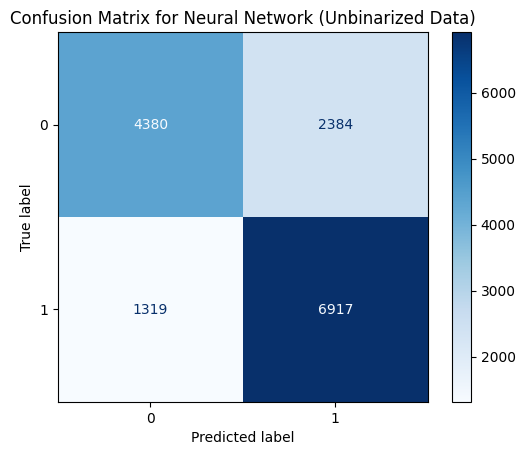

Confusion Matrix for unbinarized model plotted.


In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the unbinarized model
cm_unbinarized = confusion_matrix(y_test, y_pred_unbinarized)

# Display the confusion matrix
plt.figure(figsize=(6, 6))
disp_unbinarized = ConfusionMatrixDisplay(confusion_matrix=cm_unbinarized, display_labels=[0, 1])
disp_unbinarized.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network (Unbinarized Data)')
plt.show()

print("Confusion Matrix for unbinarized model plotted.")

**Reasoning**:
To generate predictions from the existing neural network model (which was trained on binarized data), I will use the `model.predict()` method on `test_dataset_binarized` and then convert these probabilities to class labels.



In [24]:
import numpy as np

# Generate predictions for the binarized model
y_pred_binarized_proba = model.predict(test_dataset_binarized)
y_pred_binarized = (y_pred_binarized_proba > 0.5).astype(int)

print("Predictions for binarized model generated.")

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions for binarized model generated.


**Reasoning**:
To visualize the performance of the neural network model trained on binarized data, I will generate and plot its confusion matrix using `y_test` (true labels) and `y_pred_binarized` (predicted labels).



<Figure size 600x600 with 0 Axes>

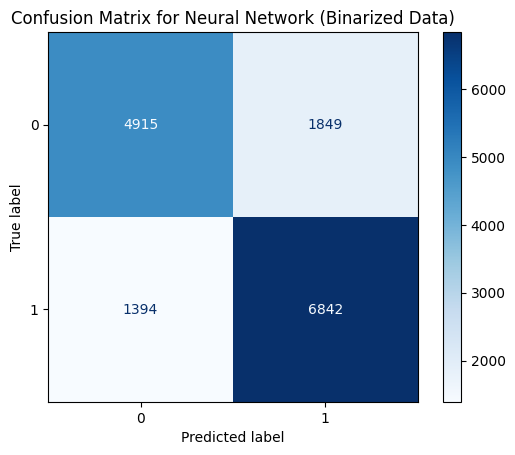

Confusion Matrix for binarized model plotted.


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the binarized model
cm_binarized = confusion_matrix(y_test, y_pred_binarized)

# Display the confusion matrix
plt.figure(figsize=(6, 6))
disp_binarized = ConfusionMatrixDisplay(confusion_matrix=cm_binarized, display_labels=[0, 1])
disp_binarized.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Neural Network (Binarized Data)')
plt.show()

print("Confusion Matrix for binarized model plotted.")

# Task
Initialize and train a GradientBoostingClassifier model using the original, unbinarized `X_train` and `y_train` datasets with default parameters.

## Initialize and Train GradientBoostingClassifier

### Subtask:
Initialize and train a GradientBoostingClassifier model using the original, unbinarized `X_train` and `y_train` datasets with default parameters.


**Reasoning**:
To initialize and train a GradientBoostingClassifier model using the original, unbinarized `X_train` and `y_train` datasets, I will import the necessary class, create a model instance, and then fit it to the training data.



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier model with default parameters
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model using the original, unbinarized training data
gbc_model.fit(X_train, y_train)

print("GradientBoostingClassifier model initialized and trained successfully!")